In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
df = pd.read_csv(r'../data/creditcard.csv')
df.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
205898,135959.0,-0.016135,0.779387,0.338848,-0.684289,0.419463,-0.770818,0.876795,-0.020144,-0.257844,...,-0.200707,-0.449062,0.081827,0.001096,-0.557196,0.121880,0.243838,0.086870,4.49,0
36684,38644.0,-0.401891,1.065095,1.158877,-0.186442,0.472340,0.017011,0.568369,0.202242,-0.717825,...,-0.199645,-0.478775,-0.043111,-0.344973,-0.201421,0.102650,0.261170,0.082497,4.37,0
228506,145539.0,-0.810674,1.125769,0.800482,-0.340789,1.477872,-0.447258,1.732574,-0.311972,-0.722140,...,0.028072,0.183479,-0.740638,-0.424764,1.264322,-0.484841,-0.319263,-0.200103,1.99,0
205980,136010.0,2.033664,-0.083339,-1.173055,0.211190,0.149599,-0.604364,0.093874,-0.169101,0.228032,...,-0.247494,-0.583148,0.287797,-0.381990,-0.283075,0.202297,-0.068615,-0.072913,1.98,0
96876,65979.0,-0.839470,-0.301824,2.627710,1.961784,-0.372225,2.032861,-0.648740,0.294790,1.443178,...,0.100707,1.147959,-0.364992,-0.817045,-0.316437,0.114042,-0.064018,0.009386,89.75,0


In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=50)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962

[[55478  1386]
 [    8    90]]


<Figure size 600x400 with 0 Axes>

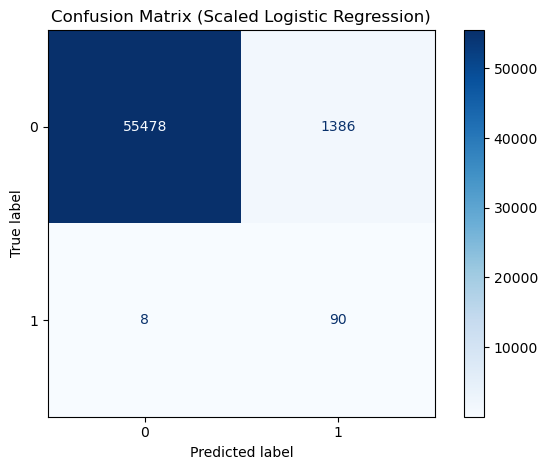

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Scaled Logistic Regression)")
plt.tight_layout()
plt.savefig('../visuals/confusion_matrix_scaled.png', dpi=300, bbox_inches='tight')
plt.show()


### Model Interpretation

Scaling the features improved convergence and increased recall on the fraud class, which is the primary objective in fraud detection. Using `class_weight='balanced'` prevented the model from ignoring the minority fraud class, and using Recall and F1-score instead of Accuracy allowed for correct performance evaluation on the imbalanced dataset.
